In [166]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from pandas import DataFrame, Series
from numpy import nan as NA

In [3]:
data=DataFrame([["A","B","C","D","E","F","G","H"],[28,8,-3,7,-1,1,18,12],[15,10,16,11,9,11,10,18]],index=["School","Estimated treatment effect, y_j","Standard error of effect estimate, sigma_j"]).T
print data

  School Estimated treatment effect, y_j  \
0      A                              28   
1      B                               8   
2      C                              -3   
3      D                               7   
4      E                              -1   
5      F                               1   
6      G                              18   
7      H                              12   

  Standard error of effect estimate, sigma_j  
0                                         15  
1                                         10  
2                                         16  
3                                         11  
4                                          9  
5                                         11  
6                                         10  
7                                         18  


In [4]:
y=np.array(data.ix[:,1])
sigma=np.array(data.ix[:,2])

In [167]:
def M_alpha(y,sigma,M_mu,M_tau):
    E_inv_tau2=1./M_tau**2
    return np.array((1./sigma**2*y+E_inv_tau2*M_mu)/(1./sigma**2+E_inv_tau2))

def S_alpha(sigma,M_tau):
    E_inv_tau2=1./M_tau**2
    value=[]
    for j in range(len(sigma)):
        value.append(1./(1./sigma**2+E_inv_tau2)[j])
    value=np.array(value)
    return np.sqrt(value)

def M_mu(M_alpha):
    return np.mean(M_alpha)

def S_mu(M_tau):
    E_inv_tau2=1./M_tau**2
    return np.sqrt(1./8*1./E_inv_tau2)
    
def M_tau(M_alpha,M_mu,S_alpha,S_mu):
    return np.sqrt(1./7*np.sum((M_alpha-M_mu)**2+S_alpha**2+S_mu**2))

def VB_8school(y,sigma,ite):
    
    J=len(y)
    
    #initialization
    M_alpha_value=[[]]
    S_alpha_value=[[]]
    for j in range(8):
        M_alpha_value[0].append(np.random.normal())
        S_alpha_value[0].append(np.random.uniform())
    
    M_mu_value=[np.random.normal()]
    S_mu_value=[np.random.uniform()]
    M_tau_value=[np.random.uniform()]
    
    for i in range(ite):
        M_alpha_value.append(M_alpha(y,sigma,M_mu_value[i],M_tau_value[i]).tolist())
        M_mu_value.append(M_mu(M_alpha_value[i]))
        S_alpha_value.append(S_alpha(sigma,M_tau_value[i]).tolist())
        S_mu_value.append(S_mu(M_tau_value[i]))
        M_tau_value.append(M_tau(np.array(M_alpha_value[i]),M_mu_value[i],np.array(S_alpha_value[i]),S_mu_value[i]))
    result=np.array(DataFrame(M_alpha_value).T).tolist()
    result.append(M_mu_value)
    result.append(M_tau_value)
    S_alpha_value=np.array(DataFrame(S_alpha_value).T).tolist()
    result.extend(S_alpha_value)
    result.append(S_mu_value)
    return DataFrame(result,index=[r"$M_{\alpha_1}$",r"$M_{\alpha_2}$",r"$M_{\alpha_3}$",r"$M_{\alpha_4}$",r"$M_{\alpha_5}$",r"$M_{\alpha_6}$",
                                   r"$M_{\alpha_7}$",r"$M_{\alpha_8}$",r"$M_{\mu}$",r"$M_{\tau}$",r"$S_{\alpha_1}$",r"$S_{\alpha_2}$",
                                   r"$S_{\alpha_3}$",r"$S_{\alpha_4}$",r"$S_{\alpha_5}$",r"$S_{\alpha_6}$",r"$S_{\alpha_7}$",r"$S_{\alpha_8}$",
                                   r"$S_{\mu}$"]).T

In [168]:
result=VB_8school(y,sigma,100)

In [169]:
result

,$M_{\alpha_1}$,$M_{\alpha_2}$,$M_{\alpha_3}$,$M_{\alpha_4}$,$M_{\alpha_5}$,$M_{\alpha_6}$,$M_{\alpha_7}$,$M_{\alpha_8}$,$M_{\mu}$,$M_{\tau}$,$S_{\alpha_1}$,$S_{\alpha_2}$,$S_{\alpha_3}$,$S_{\alpha_4}$,$S_{\alpha_5}$,$S_{\alpha_6}$,$S_{\alpha_7}$,$S_{\alpha_8}$,$S_{\mu}$
0,-0.303949,1.522725,-0.160188,1.568158,-0.688006,-0.240597,0.896388,-0.326673,0.672080,0.653526,0.668080,0.902422,0.402354,0.065599,0.906680,0.799786,0.573213,0.610388,0.899194
1,0.723856,0.703244,0.665964,0.694337,0.663310,0.673233,0.745772,0.686993,0.283482,1.556583,0.652906,0.652135,0.652981,0.652375,0.651810,0.652375,0.652135,0.653095,0.231056
2,0.578772,0.466027,0.252697,0.415336,0.246205,0.297548,0.702590,0.370451,0.694589,0.861132,1.548269,1.538061,1.549269,1.541229,1.533812,1.541229,1.538061,1.550795,0.550335
3,0.784285,0.748363,0.683917,0.732996,0.679215,0.696449,0.821972,0.720404,0.416203,1.783361,0.859716,0.857956,0.859887,0.858505,0.857217,0.858505,0.857956,0.860148,0.304456
4,0.800666,0.649962,0.374283,0.584820,0.362698,0.431155,0.958196,0.528804,0.733450,1.032592,1.770889,1.755661,1.772385,1.760376,1.749348,1.760376,1.755661,1.774672,0.630513
5,0.862053,0.810112,0.717965,0.788188,0.710928,0.735779,0.915612,0.770406,0.586323,2.018266,1.030154,1.027130,1.030448,1.028072,1.025862,1.028072,1.027130,1.030897,0.365076
6,1.073795,0.876492,0.530152,0.795204,0.510368,0.599796,1.267889,0.728037,0.788880,1.188796,2.000241,1.978375,2.002398,1.985129,1.969355,1.985129,1.978375,2.005698,0.713565
7,0.958728,0.889370,0.768079,0.860587,0.758204,0.791318,1.028725,0.837569,0.797717,2.273979,1.185080,1.180484,1.185528,1.181914,1.178559,1.181914,1.180484,1.186212,0.420303
8,1.408838,1.151834,0.722525,1.051911,0.689839,0.806007,1.643508,0.973694,0.861572,1.346735,2.248291,2.217372,2.251355,2.226893,2.204695,2.226893,2.217372,2.256047,0.803973
9,1.078582,0.988735,0.834407,0.952224,0.820802,0.863617,1.166874,0.923576,1.056019,2.566050,1.341340,1.334686,1.341990,1.336754,1.331906,1.336754,1.334686,1.342981,0.476143


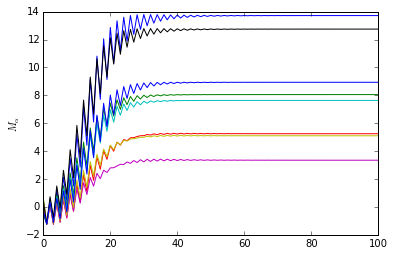

In [165]:
plt.ylabel(r"$M_{\alpha}$")
for i in range(8):
    plt.plot(result.ix[:,i])

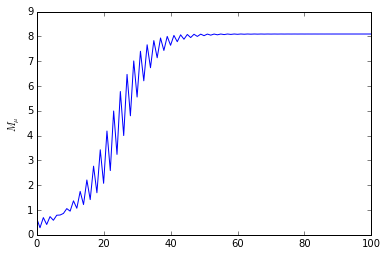

In [170]:
plt.plot(result.ix[:,8])
plt.ylabel(r"$M_{\mu}$")

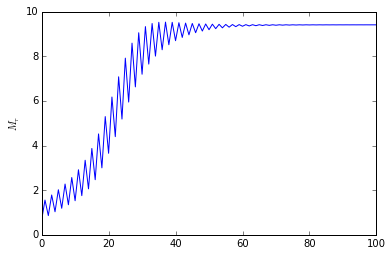

In [171]:
plt.plot(result.ix[:,9])
plt.ylabel(r"$M_{\tau}$")

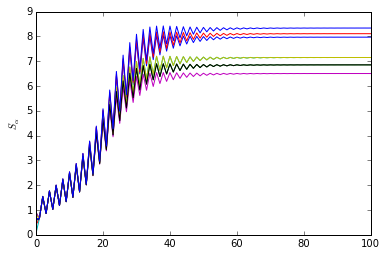

In [172]:
plt.ylabel(r"$S_{\alpha}$")
for i in range(8):
    plt.plot(result.ix[:,i+10])

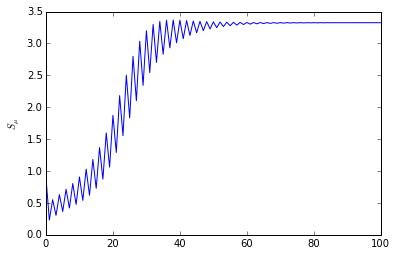

In [176]:
plt.plot(result.ix[:,18])
plt.ylabel(r"$S_{\mu}$")